In [1]:
%matplotlib inline

In [2]:
from collections import Counter
import traceback
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from konlpy.tag import Kkma, Mecab, Okt

In [3]:
tagger = Okt() # Kkma()

/Users/heegyukim/.pyenv/versions/3.6.5/envs/denuri/lib/python3.6/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [4]:
%%time
with open("../output.jsl") as f:
    lines = f.readlines()
    data = pd.DataFrame([json.loads(x) for x in lines])
# data = pd.read_csv("../data/news_reactions_tokenized.csv")
# data = pd.read_json("../data/news_reactions_tokenized.json")

CPU times: user 7.35 s, sys: 994 ms, total: 8.34 s
Wall time: 8.92 s


In [5]:
data.head()

,aid,sid,oid,title,content,scraped_at,published_at,comment_count,r.aid,good,warm,sad,angry,want
0,0000000091,102,629,"서초동 촛불집회, 오늘(28일) '찬성vs반대' 맞불 : 네이버 뉴스",\n\t\n\n\t\n\n\n\n\n\n\n\t\n\t\n[더팩트ㅣ성강현 기자] 이...,2019-09-28T02:42:15,2019.09.28. 오전 12:01,None,0000000091,46,2,2,241,1
1,0000000304,101,629,"우리·하나은행, 안전자산 예금 선호 고객 노려 DLF 팔았다 : 네이버 뉴스",\n\t\n\n\t\n\n\n\n\n\n\n\t\n\t\n[더팩트｜이지선 기자] 대...,2019-10-01T17:02:10,2019.10.01. 오후 4:49,None,0000000304,0,0,0,2,1
2,0000000318,102,607,[전두환 프로젝트] ④ 연희동 집 가구세트도 막대한 세금으로 구입 : 네이버 뉴스,\n\t\n\n\t\n\n\n\n\n\n\n\t\n\t\n\t\n----------...,2019-09-09T11:22:07,2019.09.09. 오전 11:17,None,0000000318,0,0,0,6,2
3,0000000320,102,607,"식약처, 존슨앤드존슨 제품은 빼고 '암 위험 인공유방 퇴출' : 네이버 뉴스",\n\t\n\n\t\n\n\n\n\n\n\n\t\n\t\n식품의약품안전처가 암 발병...,2019-09-10T14:20:49,2019.09.10. 오후 2:10,None,0000000320,0,0,0,14,0
4,0000000341,102,607,알고도 덮었나?...HDC신라면세점 밀수 은폐 의혹 : 네이버 뉴스,\n\t\n\n\t\n\n\n\n\n\n\n\t\n\t\n관세청이 HDC신라면세점 ...,2019-10-08T17:41:46,2019.10.08. 오후 5:26,None,0000000341,0,2,0,3,1


In [6]:
data['date'] = data['published_at'].map(lambda x: x[:10])
data.content = data.content.map(lambda x: x.strip() if x else "")

In [7]:
data.head()

,aid,sid,oid,title,content,scraped_at,published_at,comment_count,r.aid,good,warm,sad,angry,want,date
0,0000000091,102,629,"서초동 촛불집회, 오늘(28일) '찬성vs반대' 맞불 : 네이버 뉴스",[더팩트ㅣ성강현 기자] 이번 주말 서울 서초동에서 조국 법무부 장관 찬반 촛불집회가...,2019-09-28T02:42:15,2019.09.28. 오전 12:01,None,0000000091,46,2,2,241,1,2019.09.28
1,0000000304,101,629,"우리·하나은행, 안전자산 예금 선호 고객 노려 DLF 팔았다 : 네이버 뉴스",[더팩트｜이지선 기자] 대량 원금 손실을 불러온 해외 주요국 금리 연계형 파생결합상...,2019-10-01T17:02:10,2019.10.01. 오후 4:49,None,0000000304,0,0,0,2,1,2019.10.01
2,0000000318,102,607,[전두환 프로젝트] ④ 연희동 집 가구세트도 막대한 세금으로 구입 : 네이버 뉴스,----------\n1988년 2월 대통령 자리에서 물러난 전두환이 별도의 ‘전직...,2019-09-09T11:22:07,2019.09.09. 오전 11:17,None,0000000318,0,0,0,6,2,2019.09.09
3,0000000320,102,607,"식약처, 존슨앤드존슨 제품은 빼고 '암 위험 인공유방 퇴출' : 네이버 뉴스",식품의약품안전처가 암 발병 사례가 보고된 인공유방 보형물이 리콜되고 한 달이 지나서...,2019-09-10T14:20:49,2019.09.10. 오후 2:10,None,0000000320,0,0,0,14,0,2019.09.10
4,0000000341,102,607,알고도 덮었나?...HDC신라면세점 밀수 은폐 의혹 : 네이버 뉴스,관세청이 HDC신라면세점 전 대표의 시계 밀수 사건을 관세법 위반 혐의로 검찰에 송...,2019-10-08T17:41:46,2019.10.08. 오후 5:26,None,0000000341,0,2,0,3,1,2019.10.08


In [8]:
data.describe()

,good,warm,sad,angry,want
count,45748.000000,45748.000000,45748.000000,45748.000000,45748.000000
mean,147.428434,2.040658,6.414007,321.521837,4.231158
std,867.559820,13.376704,64.088924,1449.099182,12.573227
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.000000,0.000000
50%,6.000000,0.000000,0.000000,15.000000,1.000000
75%,29.000000,2.000000,2.000000,106.000000,4.000000
max,41867.000000,2569.000000,7702.000000,50444.000000,1173.000000


In [13]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(np.arange(len(data)), data.date)
ax.invert_yaxis()
plt.show()

KeyboardInterrupt: 

## 텍스트 분석
제목 평균길이<br>
내용 평균길이<br>
토큰 길이 분석

In [9]:
%%time 

allowed_pos = [
    'Noun', 'Verb', 'Adjective', 'Adverb', 'Alpha', 'Determiner', 'Exclamation'
    , 'Suffix', 'PreEomi', 'Unknown'
]
def try_tagging(x):
    x = x.strip() if x else ""
    tokens = tagger.pos(x)
    tokens = filter(lambda x: x[1] in allowed_pos, tokens)
    tokens = map(lambda x: x[0], tokens)
    return list(tokens)

# print(tagger.tagset)
# print(" ".join(try_tagging(data.content[1])))
data['title_len'] = data['title'].map(lambda x: len(x))
data['content_len'] = data['content'].map(lambda x: len(x))
data['title_token'] = data.title.map(try_tagging)
data['title_token_len'] = data.title_token.map(lambda x: len(x))
data['content_token'] = data.content.map(try_tagging)
data['content_token_len'] = data.content_token.map(lambda x: len(x))

CPU times: user 41min 27s, sys: 27.8 s, total: 41min 55s
Wall time: 43min 3s


In [10]:
print(data['title_token'].head())
print(data['content_token'].head())

0           [서초동, 촛불집회, 오늘, 찬성, vs, 반대, 맞, 불, 네이버, 뉴스]
1    [우리, 하나은행, 안전, 자산, 예금, 선호, 고객, 노려, DLF, 팔았다, 네...
2     [전두환, 프로젝트, 연희동, 집, 가구, 세트, 막대, 세금, 구입, 네이버, 뉴스]
3    [식약처, 존슨, 앤드, 존슨, 제품, 빼고, 암, 위험, 인공, 유방, 퇴, 출,...
4        [알고도, 덮었나, HDC, 신라, 면세점, 밀수, 은폐, 의혹, 네이버, 뉴스]
Name: title_token, dtype: object
0    [더, 팩트, 성강현, 기자, 이번, 주말, 서울, 서초동, 조국, 법무부, 장관,...
1    [더, 팩트, 이지선, 기자, 대량, 원금, 손실, 불러, 온, 해외, 국, 금리,...
2    [대통령, 자리, 물러난, 전두환, 별도, 전직, 대통령, 사무실, 내지, 않았으면...
3    [식품의약품안전처, 암, 발병, 사례, 보고, 된, 인공, 유방, 보, 형, 물이,...
4    [관세청, HDC, 신라, 면세점, 전, 대표, 시계, 밀수, 사건, 관세, 법, ...
Name: content_token, dtype: object


Title length
count    45748.000000
mean        41.296975
std          6.414946
min         16.000000
25%         37.000000
50%         41.000000
75%         45.000000
max        104.000000
Name: title_len, dtype: float64


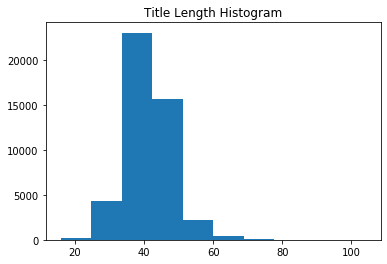

Title token length
count    45748.000000
mean        11.348474
std          2.137689
min          3.000000
25%         10.000000
50%         11.000000
75%         13.000000
max         29.000000
Name: title_token_len, dtype: float64


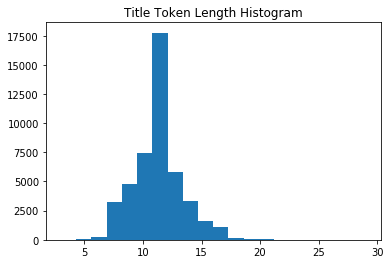

In [11]:
print("Title length")
print(data.title_len.describe())
plt.title("Title Length Histogram")
plt.hist(data['title_len'], bins=10)
plt.show()

print("Title token length")
print(data.title_token_len.describe())
plt.title("Title Token Length Histogram")
plt.hist(data['title_token_len'], bins=20)
plt.show()

Content length
count    45748.000000
mean      1500.241606
std       1009.203270
min          0.000000
25%        970.000000
50%       1314.500000
75%       1780.000000
max      28082.000000
Name: content_len, dtype: float64


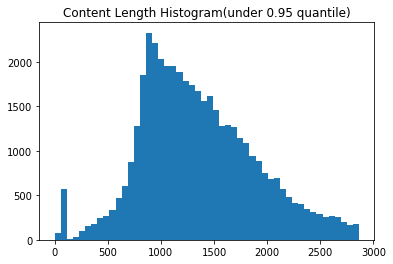

Content token length
count    45748.000000
mean       401.600726
std        273.262470
min          0.000000
25%        255.000000
50%        352.000000
75%        481.000000
max       7542.000000
Name: content_token_len, dtype: float64


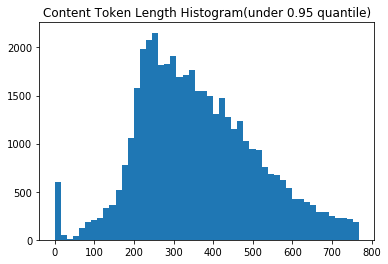

In [12]:
print("Content length")
print(data.content_len.describe())
plt.title("Content Length Histogram(under 0.95 quantile)")
plt.hist(data[data.content_len < data.content_len.quantile(0.95)]['content_len'], bins=50)
plt.show()

print("Content token length")
print(data.content_token_len.describe())
plt.title("Content Token Length Histogram(under 0.95 quantile)")
plt.hist(data[data.content_token_len < data.content_token_len.quantile(0.95)] ['content_token_len'], bins=50)
plt.show()

## 감정 분석
4분위 분석
감정표현 총 합의 평균

In [13]:
reactions = data[['good', 'warm', 'sad', 'angry', 'want']]
total = reactions.sum(axis=1)
pos = data[['good', 'warm']].sum(axis=1)
neg = data.angry

Total Reactions
count    45748.000000
mean       481.636093
std       1755.886360
min          0.000000
25%          8.000000
50%         40.000000
75%        237.000000
max      52982.000000
dtype: float64


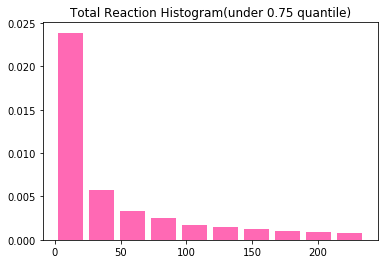

Positive Reactions(Good,Warm)
count    45748.000000
mean       149.469092
std        871.897069
min          0.000000
25%          2.000000
50%          7.000000
75%         31.000000
max      42011.000000
dtype: float64


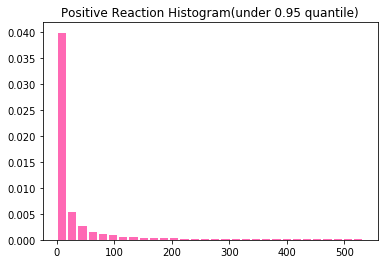

Negative Reactions(Sad, Angry)
count    45748.000000
mean       321.521837
std       1449.099182
min          0.000000
25%          2.000000
50%         15.000000
75%        106.000000
max      50444.000000
Name: angry, dtype: float64


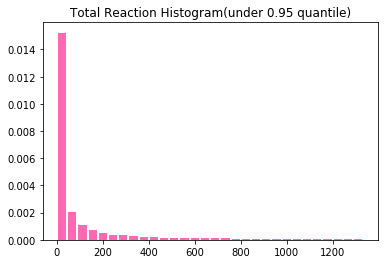

In [21]:
print("Total Reactions")
print(total.describe())
plt.title("Total Reaction Histogram(under 0.75 quantile)")
plt.hist(total[total < total.quantile(0.75)] , 
         bins=10, ## 몇 개의 바구니로 구분할 것인가. 
         density=True, ## ytick을 퍼센트비율로 표현해줌 
         cumulative=False, ## 누적으로 표현하고 싶을 때는 True
         histtype='bar',  ## 타입. or step으로 하면 모양이 바뀜.  
         orientation='vertical', ## or horizontal
         rwidth=0.8, ## 1.0일 경우, 꽉 채움 작아질수록 간격이 생김
         color='hotpink', ## bar 색깔
        )
plt.show()
print("Positive Reactions(Good,Warm)")
print(pos.describe())
plt.title("Positive Reaction Histogram(under 0.95 quantile)")
plt.hist(pos[pos < pos.quantile(0.95)] , 
         bins=30, ## 몇 개의 바구니로 구분할 것인가. 
         density=True, ## ytick을 퍼센트비율로 표현해줌 
         cumulative=False, ## 누적으로 표현하고 싶을 때는 True
         histtype='bar',  ## 타입. or step으로 하면 모양이 바뀜.  
         orientation='vertical', ## or horizontal
         rwidth=0.8, ## 1.0일 경우, 꽉 채움 작아질수록 간격이 생김
         color='hotpink', ## bar 색깔
        )
plt.show()
print("Negative Reactions(Sad, Angry)")
print(neg.describe())
plt.title("Total Reaction Histogram(under 0.95 quantile)")
plt.hist(neg[neg < neg.quantile(0.95)] , 
         bins=30, ## 몇 개의 바구니로 구분할 것인가. 
         density=True, ## ytick을 퍼센트비율로 표현해줌 
         cumulative=False, ## 누적으로 표현하고 싶을 때는 True
         histtype='bar',  ## 타입. or step으로 하면 모양이 바뀜.  
         orientation='vertical', ## or horizontal
         rwidth=0.8, ## 1.0일 경우, 꽉 채움 작아질수록 간격이 생김
         color='hotpink', ## bar 색깔
        )
plt.show()

In [27]:
category_label = ['pos', 'neg', 'unk', 'few']
category = []
pos_neg_rates = []
ok = 0

for i in range(len(data)):
    r = 2
    p = pos[i]
    n = neg[i]
    
    if p + n >= 50 :
        rate = p / (n + p)
        pos_neg_rates.append(rate)
        if abs(rate - 0.5) > 0.05:
            r = 0 if p > n else 1
        else:
            r = 2
        ok = ok + 1
    else:
        r = 3
        
    category.append(r)

print("total count", len(category), ok)

total count 45748 20794


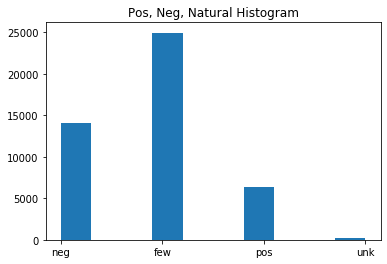

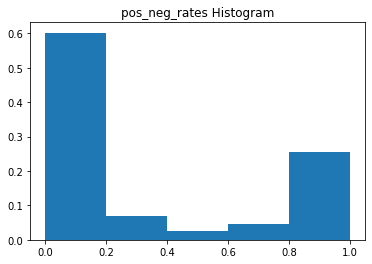

In [28]:
plt.title("Pos, Neg, Natural Histogram")
# plt.hist(list(map(lambda x: category_label[x], category)), weights=np.ones(len(category)) / len(category))
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.hist(list(map(lambda x: category_label[x], category)))
plt.show()
plt.title("pos_neg_rates Histogram")
plt.hist(pos_neg_rates, bins=5, weights=np.ones(len(pos_neg_rates)) / len(pos_neg_rates))
plt.show()

In [29]:
data['reaction_category'] = category
data.head()

,aid,sid,oid,title,content,scraped_at,published_at,comment_count,r.aid,good,...,angry,want,date,title_len,content_len,title_token,title_token_len,content_token,content_token_len,reaction_category
0,0000000091,102,629,"서초동 촛불집회, 오늘(28일) '찬성vs반대' 맞불 : 네이버 뉴스",[더팩트ㅣ성강현 기자] 이번 주말 서울 서초동에서 조국 법무부 장관 찬반 촛불집회가...,2019-09-28T02:42:15,2019.09.28. 오전 12:01,None,0000000091,46,...,241,1,2019.09.28,38,875,"[서초동, 촛불집회, 오늘, 찬성, vs, 반대, 맞, 불, 네이버, 뉴스]",10,"[더, 팩트, 성강현, 기자, 이번, 주말, 서울, 서초동, 조국, 법무부, 장관,...",241,1
1,0000000304,101,629,"우리·하나은행, 안전자산 예금 선호 고객 노려 DLF 팔았다 : 네이버 뉴스",[더팩트｜이지선 기자] 대량 원금 손실을 불러온 해외 주요국 금리 연계형 파생결합상...,2019-10-01T17:02:10,2019.10.01. 오후 4:49,None,0000000304,0,...,2,1,2019.10.01,42,3951,"[우리, 하나은행, 안전, 자산, 예금, 선호, 고객, 노려, DLF, 팔았다, 네...",12,"[더, 팩트, 이지선, 기자, 대량, 원금, 손실, 불러, 온, 해외, 국, 금리,...",1154,3
2,0000000318,102,607,[전두환 프로젝트] ④ 연희동 집 가구세트도 막대한 세금으로 구입 : 네이버 뉴스,----------\n1988년 2월 대통령 자리에서 물러난 전두환이 별도의 ‘전직...,2019-09-09T11:22:07,2019.09.09. 오전 11:17,None,0000000318,0,...,6,2,2019.09.09,45,2612,"[전두환, 프로젝트, 연희동, 집, 가구, 세트, 막대, 세금, 구입, 네이버, 뉴스]",11,"[대통령, 자리, 물러난, 전두환, 별도, 전직, 대통령, 사무실, 내지, 않았으면...",651,3
3,0000000320,102,607,"식약처, 존슨앤드존슨 제품은 빼고 '암 위험 인공유방 퇴출' : 네이버 뉴스",식품의약품안전처가 암 발병 사례가 보고된 인공유방 보형물이 리콜되고 한 달이 지나서...,2019-09-10T14:20:49,2019.09.10. 오후 2:10,None,0000000320,0,...,14,0,2019.09.10,42,2994,"[식약처, 존슨, 앤드, 존슨, 제품, 빼고, 암, 위험, 인공, 유방, 퇴, 출,...",14,"[식품의약품안전처, 암, 발병, 사례, 보고, 된, 인공, 유방, 보, 형, 물이,...",875,3
4,0000000341,102,607,알고도 덮었나?...HDC신라면세점 밀수 은폐 의혹 : 네이버 뉴스,관세청이 HDC신라면세점 전 대표의 시계 밀수 사건을 관세법 위반 혐의로 검찰에 송...,2019-10-08T17:41:46,2019.10.08. 오후 5:26,None,0000000341,0,...,3,1,2019.10.08,37,2717,"[알고도, 덮었나, HDC, 신라, 면세점, 밀수, 은폐, 의혹, 네이버, 뉴스]",10,"[관세청, HDC, 신라, 면세점, 전, 대표, 시계, 밀수, 사건, 관세, 법, ...",750,3


In [30]:
# 전처리 결과 저장
preprocessed_labels = [
    'title_token',
    'content_token',
    'reaction_category'
]
data[preprocessed_labels].to_json("../data/news_45000.json")